In [1]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import fbeta_score
from common import get_train, get_test, get_parking, feat_eng, premodel_formating, mean_target_enc, get_XY
import pandas as pd

%matplotlib inline

In [2]:
train_df = get_train()
test_df = get_test()

train_df = feat_eng(train_df)
test_df = feat_eng(test_df)

Time it took: 0.1554431915283203
Time it took: 0.09683775901794434
adding additional features to test and/or train ...

loading parking data 1.7M
loading address data 30K
calculating closest joins
merging
complete
fixing neighborhood string formatting
merging in neighborhood information
Time it took: 0.6325128078460693
adding additional features to test and/or train ...

loading parking data 1.7M
loading address data 30K
calculating closest joins
merging
complete
fixing neighborhood string formatting
merging in neighborhood information
Time it took: 0.4659900665283203


In [3]:
train_df.head()

,Street,From,To,Date,Time,Real.Spots,Street.Length,any_spot,holiday,day,...,apt4_pct,area,f_pop,house_avg_value,house_pct,m_pop,med_age,pop,twn_avg_value,twn_pct
0,Mission Street,25th Street,26th Street,2014-01-07,16:19,4,179.132970,1,0,7,...,12.6,1.049,38.4,972996.0,44.9,39.2,38.4,25825.0,1048521.0,18.5
1,Polk Street,Ellis Street,Olive Street,2014-01-18,20:42,0,52.740210,0,0,18,...,2.0,0.391,42.5,659375.0,1.6,41.9,42.5,14670.0,718750.0,2.0
2,Van Ness Avenue,Geary Boulevard,Myrtle Street,2014-01-18,20:39,0,52.517840,0,0,18,...,5.8,0.368,47.1,1407653.0,3.2,40.7,47.1,14331.0,1041250.0,6.6
3,Van Ness Avenue,Bush Street,Fern Street,2014-01-18,20:38,0,52.405315,0,0,18,...,NaN,0.036,45.9,NaN,NaN,42.2,45.9,1395.0,NaN,NaN
4,Van Ness Avenue,Daniel Burnham Court,Post Street,2014-01-18,20:38,0,52.191193,0,0,18,...,NaN,0.278,41.5,NaN,NaN,41.2,41.5,9194.0,NaN,NaN


In [67]:
tr, vl = premodel_formating(train_df)
y_tr = tr['any_spot'].values
y_vl = vl['any_spot'].values
X_tr = tr[[col for col in tr.columns if col not in ['any_spot','Real.Spots']]].copy()
X_vl = vl[[col for col in tr.columns if col not in ['any_spot','Real.Spots']]].copy()
print(y_tr.shape, X_tr.shape, y_vl.shape, X_vl.shape)

(770,) (770, 18) (330,) (330, 18)


In [68]:
rfc = RandomForestClassifier(n_estimators= 10, max_depth=10)
m = rfc.fit(X_tr, y_tr)

In [69]:
m.score(X_tr, y_tr)

0.90000000000000002

In [70]:
m.score(X_vl, y_vl)

0.72121212121212119

In [71]:
xgc = XGBClassifier(max_depth = 10, n_estimators=200)
m =rfc.fit(X_tr, y_tr)

#### Training score

In [72]:
m.score(X_tr, y_tr)

0.92337662337662341

### Validation Score

In [73]:
m.score(X_vl, y_vl)

0.72121212121212119

### F0.5 Beta score

In [74]:
y_hat = m.predict(X_vl)
fbeta_score(y_vl, y_hat, beta=0.5)

0.62616822429906549

In [19]:
def plot_pred_coord(y_true, lat_true, lon_true, y_pred):
    """
    Should have ANY_SPOT, LAT, LON in both datasets
    """
    plot_mask1 = (y_hat == y_vl)
    plot_mask2 = (y_hat != y_vl) & (y_vl==0)
    plot_mask3 = (y_hat != y_vl) & (y_vl==1)
    
    plt.figure(figsize=(11,6))
    plt.scatter(lat_true[plot_mask1], lon_true[plot_mask1], c = 'g')
    plt.scatter(lat_true[plot_mask2], lon_true[plot_mask2], c = 'r')
    plt.scatter(lat_true[plot_mask3], lon_true[plot_mask3], c = 'b')

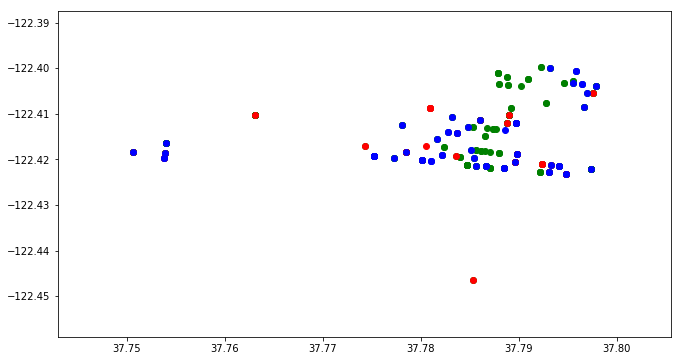

In [20]:
plot_pred_coord(y_hat, X_vl['From_lat'].values, X_vl['From_long'].values , y_vl)

### Prep for submission

In [14]:
trn = premodel_formating(train_df, split=False)
tst = premodel_formating(test_df, split=False, test=True)
trn, tst = mean_target_enc(trn, tst)
print(trn.shape, tst.shape)

validation or test nulls 75, will fill with 0.4
(1100, 24) (726, 22)


In [18]:
trn.shape, tst.shape

((1100, 24), (726, 22))

In [21]:
X_tr, y_tr = get_XY(trn)

In [22]:
X_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1100 entries, 0 to 1099
Data columns (total 22 columns):
Street.Length       1100 non-null float64
holiday             1100 non-null int64
dow                 1100 non-null int64
mon                 1100 non-null int64
hour                1100 non-null int64
morn_night          1100 non-null int64
From_lat            1100 non-null float64
From_long           1100 non-null float64
From_zip            1100 non-null int64
To_lat              1100 non-null float64
To_long             1100 non-null float64
To_zip              1100 non-null int64
nhood               1100 non-null int64
zipcode             1100 non-null int64
area                1100 non-null float64
f_pop               1100 non-null float64
m_pop               1100 non-null float64
pop                 1100 non-null float64
mean_spot_prob      1100 non-null float64
mean_spot_ct        1100 non-null float64
z_mean_spot_prob    1100 non-null float64
z_mean_spot_ct      1100 non-

In [23]:
print(X_tr.shape, y_tr.shape)

(1100, 22) (1100,)


In [24]:
rfc = RandomForestClassifier(n_estimators= 10, max_depth=10)
m = rfc.fit(X_tr, y_tr)

In [25]:
xgc = XGBClassifier(max_depth = 5, n_estimators=100)
m = xgc.fit(X_tr, y_tr)

In [26]:
tst_pred = m.predict(tst)
to_sub = pd.DataFrame({'id': range(1, len(tst_pred)+1), 'any_spot': tst_pred})

In [27]:
to_sub[['id','any_spot']].to_csv('submissions/mean_enc_sub.csv', index=False)
to_sub.shape

(726, 2)